






















Target word: 0






Target word: 0



train_dataset length = 4032, test_dataset length = 452


inputs.shape : torch.Size([16, 8, 64]) [batch, time, channel]
targets.shape: torch.Size([16]) [batch]
1st sample shape: torch.Size([8, 64]) [time, channel]
targets (words) in this batch: tensor([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])




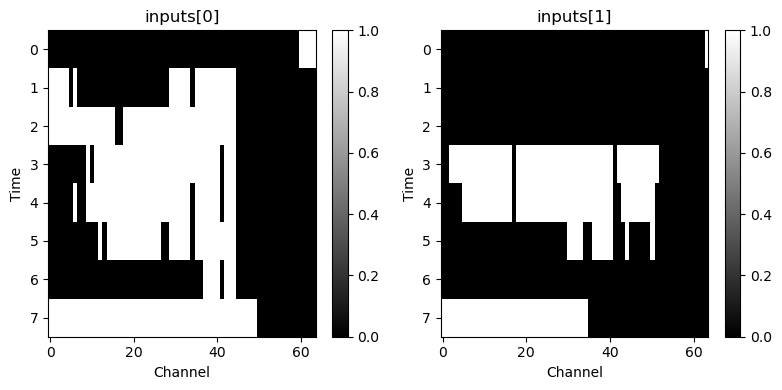

In [4]:
## 알아서 데이터를 웹에서 다운로드 하게 돼 있습니다. 따로 웹에서 데이터를 안 가져오셔도 됩니다.

## 아래 패키지들 설치 필요합니다.

## 아마 hashlib 말고는 다 설치가 돼 있을 것 같습니다.
## tonic_custom은 이 작업 폴더에 있으니까 설치 안하셔도 됩니다.

## 일단 그냥 RUN 해보시면 바로 되게 해놨습니다.

import os
import torch
import matplotlib.pyplot as plt
import hashlib

import tonic_custom as tonic
from tonic_custom import DiskCachedDataset

def data_loader(which_data, data_path, BATCH, IMAGE_SIZE, TIME, dvs_clipping, dvs_duration, exclude_class, merge_polarities, 
                denoise_on, my_seed, extra_train_dataset, num_workers, chaching_on, pin_memory):

    ### n_tidigits_tonic ########################################################################################################
    ### n_tidigits_tonic ########################################################################################################
    ### n_tidigits_tonic ########################################################################################################
    ### n_tidigits_tonic ########################################################################################################
    if which_data == 'n_tidigits_tonic':
        target_word = dvs_duration


        transform_compose=[]


        # transform_compose.append(tonic.transforms.CropTime(min=0, max=1_024_000))
        # transform_compose.append(tonic.transforms.ToFrame(
        #     sensor_size=tonic.datasets.NTIDIGITS18.sensor_size,
        #     time_window=10_000, 
        #     include_incomplete=False))
        
        transform_compose.append(tonic.transforms.ToFrame(
            sensor_size=tonic.datasets.NTIDIGITS18.sensor_size,
            n_time_bins=TIME,))
        # transform_compose.append(tonic.transforms.ToFrame(
        #     sensor_size=tonic.datasets.NTIDIGITS18.sensor_size,
        #     n_event_bins=TIME,))


        transform_compose = tonic.transforms.Compose(transform_compose)
        
        train_dataset= tonic.datasets.NTIDIGITS18(save_to=data_path, train=True, single_digits=True, transform=transform_compose, target_word=target_word, clipping = dvs_clipping)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH, shuffle = True, num_workers=num_workers, drop_last=False, generator=torch.Generator().manual_seed(my_seed), pin_memory = pin_memory)

        # train_dataset= tonic.datasets.NTIDIGITS18(save_to=data_path, train=False, single_digits=True, transform=transform_compose, target_word=target_word)
        # train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH, shuffle = False, num_workers=num_workers, drop_last=False, generator=torch.Generator().manual_seed(my_seed), pin_memory = pin_memory)


        test_dataset= tonic.datasets.NTIDIGITS18(save_to=data_path, train=False, single_digits=True, transform=transform_compose, target_word=target_word, clipping = dvs_clipping)
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH, shuffle = False, num_workers=num_workers, drop_last=False, generator=torch.Generator().manual_seed(my_seed), pin_memory = pin_memory)

        in_channel = 1
        # CLASS_NUM = 10 if target_word is None else 2
        CLASS_NUM = 2
        # CLASS_NUM = 10
        train_data_count = len(train_dataset)
        print(f'train_dataset length = {len(train_dataset)}, test_dataset length = {len(test_dataset)}')
    ################################################################################################

    else:
        assert False, 'which_data가 잘못됨.'

    return train_loader, test_loader, in_channel, CLASS_NUM, train_data_count

print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')

train_loader, test_loader, synapse_conv_in_channels, CLASS_NUM, train_data_count = data_loader(
        which_data = 'n_tidigits_tonic', 
        # 'DVS_GESTURE_TONIC' or 'NMNIST_TONIC' 

        data_path = '/data2', 
        # '/data2' or '/data3', etc. # gpu 서버 경로 설정. nfs 로 해놓지만 않으면 됩니다.

        BATCH = 16, 
        # 원하는 값

        IMAGE_SIZE = 64, 
        # 저는 ntidigits에서 안 썼습니다. 

        TIME = 8, 
        # 원하는 것
        # time-binning 개수

        dvs_clipping = 1,
        # 0 이상 아무거나
        # 이 숫자보다 크거나 같을 때 해당 칸을 1, 작으면 0으로 clpping 됩니다. dvs_duration 시간 동안 스파이크 개수가 누적되기도하고
        # IMAGE_SIZE를 작게하면 sum_pooling 되어 누적되기도 하니까 이 dvs_clipping을 1이상으로 설정해야 됩니다.
        # 만약 dvs_clipping을 0으로 하면 clipping은 하지않고 모든 스파이크를 다 더한 정수값이 나옵니다.  

        dvs_duration = 0,
        # 저는 이 파라미터를 target word로 했습니다.
        # 진짜 duration이랑은 아예 관련 없구요, 0,1,2,3,4,5,6,7,8,9 중에 하나로 지정하시면 됩니다.

        exclude_class = True,
        # 저는 ntidigits에서 안 썼습니다.

        merge_polarities = True,
        # 저는 ntidigits에서 안 썼습니다.

        denoise_on = False,
        # 저는 ntidigits에서 안 썼습니다.

        my_seed = 1,
        # seed 지정입니다. train_loader 셔플 시드 값입니다.

        extra_train_dataset = 0,
        # 저는 ntidigits에서 안 썼습니다.

        num_workers = 2,
        # 2 추천
        # 저는 그냥 2로 합니다. 이걸 해야 무슨 CPU(GPU아님)를 덜 먹었었나 그랬습니다.

        chaching_on = True,
        # True 추천
        # 이걸 해야 데이터 캐싱이 가능합니다.

        pin_memory = True,
        # True 추천
        # 저는 그냥 2로 합니다. 이걸 해야 무슨 CPU(GPU아님)를 덜 먹었었나 그랬습니다.
        
        ) 

print('\n')

for inputs, targets in train_loader:
    inputs = inputs.squeeze(2)  # channel dim=2 값이 1이면 제거
    print("inputs.shape :", inputs.shape, '[batch, time, channel]')
    print("targets.shape:", targets.shape, '[batch]')
    print(f'targets (words) in this batch: {targets}')
    print("1st sample shape:", inputs[0].shape, '[time, channel]')

    img0 = inputs[0].cpu().numpy()
    img1 = inputs[1].cpu().numpy()

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img0, cmap='gray', aspect='auto')
    plt.title("inputs[0]")
    plt.xlabel("Channel")
    plt.ylabel("Time")
    plt.colorbar()  # 색상 막대 추가

    plt.subplot(1, 2, 2)
    plt.imshow(img1, cmap='gray', aspect='auto')
    plt.title("inputs[1]")
    plt.xlabel("Channel")
    plt.ylabel("Time")
    plt.colorbar()

    plt.tight_layout()
    plt.savefig("snapshot.png")
    # plt.show()
    print('\n')

    break

### ./tonic_custom/datasets/ntidigits18.py
### 위 파일 코드의 class NTIDIGITS18(Dataset) 를 보시면 
### 좀 수정 돼 있습니다. binary classification 할 수 있게요.
